In [1]:
%cd C:/Users/sylee/Documents/GitHub/DataSafe

C:\Users\sylee\Documents\GitHub\DataSafe


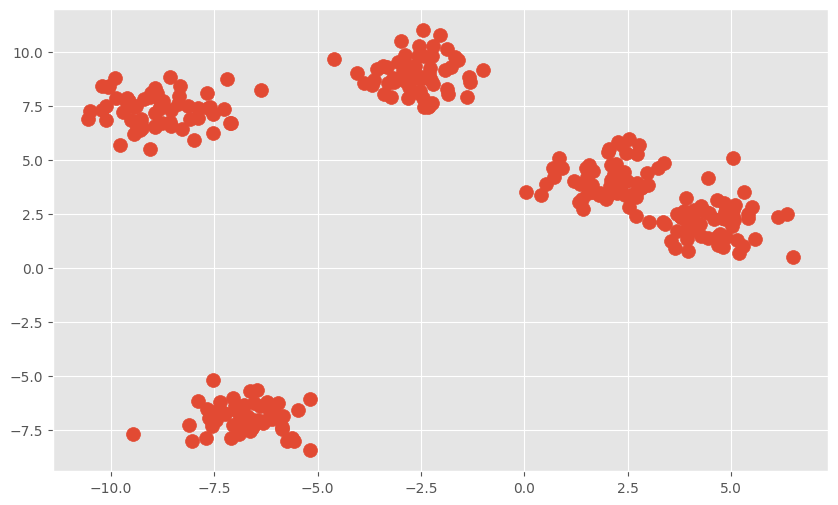

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')  # 'ggplot' 스타일을 설정

from sklearn.datasets import make_blobs  # 가상 데이터 생성
X, y_true = make_blobs(n_samples=300, centers=5,
                       cluster_std=0.8, random_state=42)
# n_samples: 생성할 샘플의 수
# centers: 생성할 클러스터의 수
# cluster_std: 클러스터의 표준 편차
# random_state: 재현성을 위한 시드(seed)값

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=100);   # X 데이터에서 첫번째와 두번째 열(column)을 선택

335.8832732264418


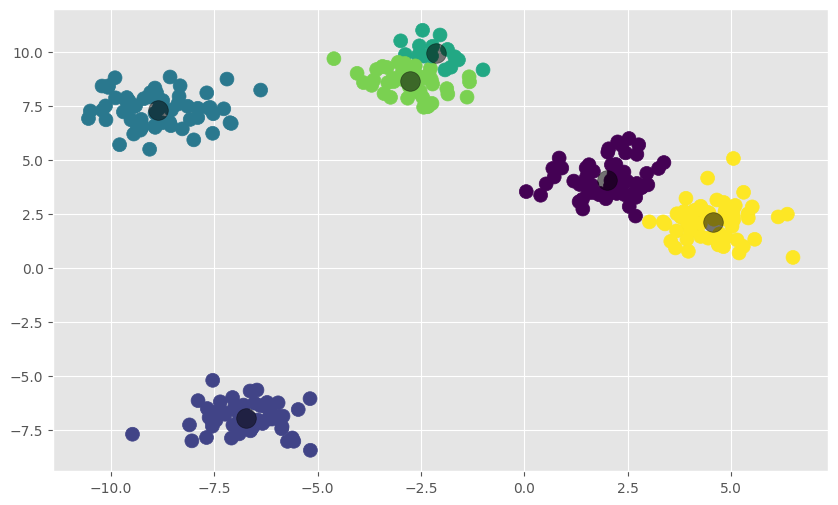

In [5]:
import cv2
import numpy as np

# 종료 기준 설정 (최대 반복 횟수와 정확도를 사용하여)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,
            10, 1.0)  # 종료 기준: 최대 반복 횟수 10회, 정확도 1.0

# K-means 클러스터링에 사용할 초기 클러스터 중심 설정 방법 지정
flags = cv2.KMEANS_RANDOM_CENTERS  # 무작위로 클러스터 중심을 선택

# OpenCV의 kmeans 함수를 사용하여 K-means 클러스터링을 수행
compactness, labels, centers = cv2.kmeans(X.astype(np.float32), 6,
                                          None, criteria, 10, flags)


## compactness: K-means 클러스터링 결과의 총 제곱 오차의 합
## X.astype(np.float32): 입력 데이터를 float32 형태로 변환
## 6: 클러스터의 개수를 6개로 설정
## None: 초기 레이블 설정을 사용하지 않음음
## criteria: 앞에서 정의한 종료 기준을 사용
## 10: K-means 알고리즘을 10번 반복 수행
## flags: 앞에서 정의한 초기 클러스터 중심 설정 방법을 사용

print(compactness)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, s=100)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [6]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [7]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sylee\anaconda3\envs\pythonEx\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [8]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [9]:
# 실제 라벨과 비교하여 군집화가 얼마나 효과적으로 되었는지 확인
# iris_df에 클러스터링 결과(cluster)와 실제 라벨(target) 컬럼 생성
irisDF['target'] = iris.target
irisDF['cluster']=kmeans.labels_

# 1차 target, 2차 cluster로 groupby
# count로 aggregate하는 것이 목적이므로 4가지 기존 feature 중 임의로 sepal_length 선택
iris_result = irisDF.groupby(['target','cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


In [10]:
from sklearn.decomposition import PCA

# 4개의 특성을 2차원으로 차원 축소
# PCA 객체를 생성하고, 주성분의 개수를 2개로 설정
pca = PCA(n_components=2)

# iris 데이터를 사용하여 PCA를 수행하고, 변환된 결과를 저장
pca_transformed = pca.fit_transform(iris.data)

# 변환된 결과를 데이터 프레임에 새로운 열로 추가
irisDF['pca_x'] = pca_transformed[:, 0]  # 첫 번째 주성분 값을 'pca_x' 열에 저장
irisDF['pca_y'] = pca_transformed[:, 1]  # 두 번째 주성분 값을 'pca_y' 열에 저장

# 데이터 프레임의 첫 3개 행을 출력
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


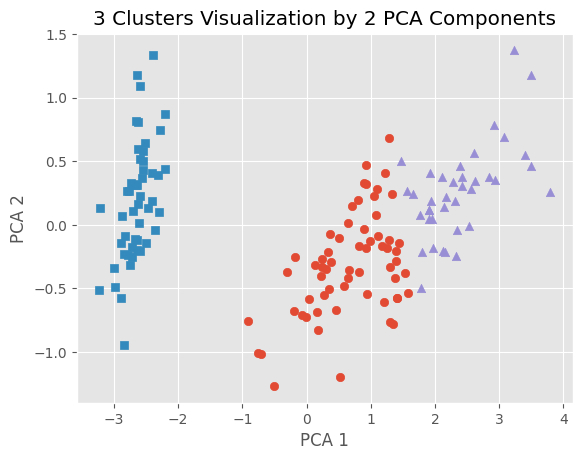

In [11]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()